<a href="https://colab.research.google.com/github/kimaing/machine/blob/main/%EC%A0%84%EB%B3%B5%EB%AC%B4%EA%B2%8C_%EC%98%88%EC%B8%A1_%EB%8B%A4%EC%A4%91%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80_0411.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 전복 순살 무게 예측
- https://www.kaggle.com/datasets/rodolfomendes/abalone-dataset?resource=download&select=abalone.csv

# 데이터셋 Feature 소개

[0] Sex: M(male, 수), F(female, 암), I(infant, 유아) | object

[1] Length: 길이, 가장 긴 쉘 측정(mm) | float

[2] Diameter: 지름, 길이에 수직(mm) | float

[3] Height: 높이, 껍데기와 고기를 포함(mm) | float

[4] Whole weight: 전체 전복의 무게(grams) | float

[5] shucked weight: 고기의 무게(grams) | float

[6] Viscera weight: 전복의 출혈 후 내장 무게(grams) | float

[7] Shell weight: 건조 후 껍질 무게(grams) | float

[8] Rings: 고리의 수. +1.5는 나이(년)를 나타냄 | int
[출처] [모두의 딥러닝] abalone.csv | 전복 데이터 분석 및 활용|작성자 채백

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/abalone.csv')
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [ ]:
#데이터 정보
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [ ]:
#데이터 통계정보
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


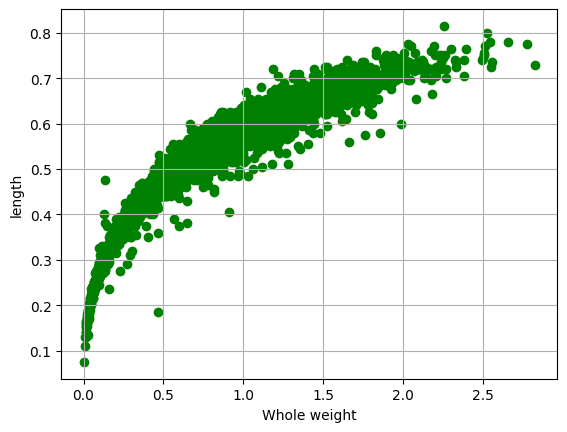

In [ ]:
# 시각화하기
# Whole weight, length 데이터로 산점도 출력하기
plt.scatter(df['Whole weight'],df['Length'], color='green')
plt.xlabel('Whole weight')
plt.ylabel('length')
plt.grid()
plt.show()

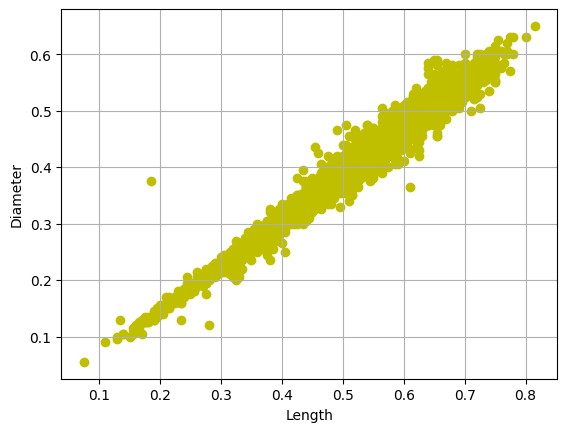

In [ ]:
# 시각화하기
# Length, Diameter 데이터로 산점도 출력하기
plt.scatter(df['Length'],df['Diameter'], color='y')
plt.xlabel('Length')
plt.ylabel('Diameter')
plt.grid()
plt.show()

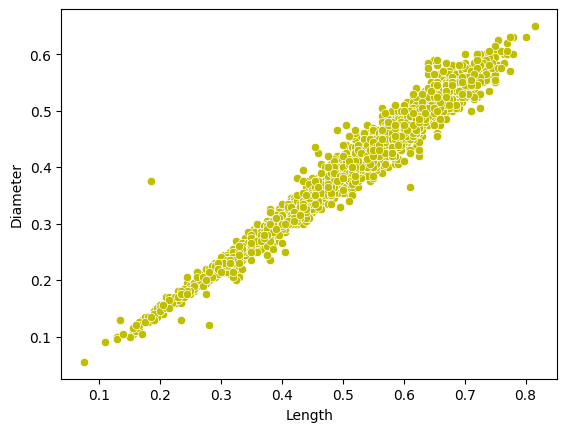

In [ ]:
# 씨본으로 시각화
ax=sns.scatterplot(x=df['Length'], y=df['Diameter'], color='y')
ax.set(xlabel='Length', ylabel='Diameter')
plt.show()

# 상관관계
- -1~1사이의 값을 가짐
- 절대값이 1에 가까울수록 상관관계가 높음
- 0에 가까울수록 상관관계가 낮음
- 학습에 사용하는 데이터셋은 상관관계가 높을수록 정확도가 높아짐
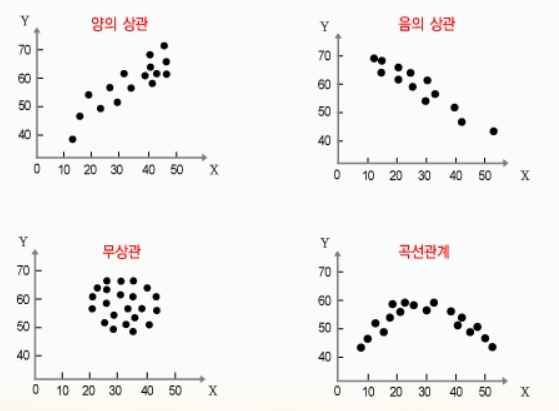

In [ ]:
#성별은 문자이므로 일단 제외
#머신러닝은 수치데이터만 학습과 연산이 가능함
#전체 행, 1번 이후 열만 추출
df2=df.iloc[:,1:]
df2

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [ ]:
#상관관계 계수
df2.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


In [ ]:
#피어슨 상관계수, 스피어만 상관계수
print( df2['Length'].corr(df2['Diameter'], method='pearson')  )
print( df2['Length'].corr(df2['Diameter'], method='spearman')  )

0.9868115846024929
0.9833190319559632


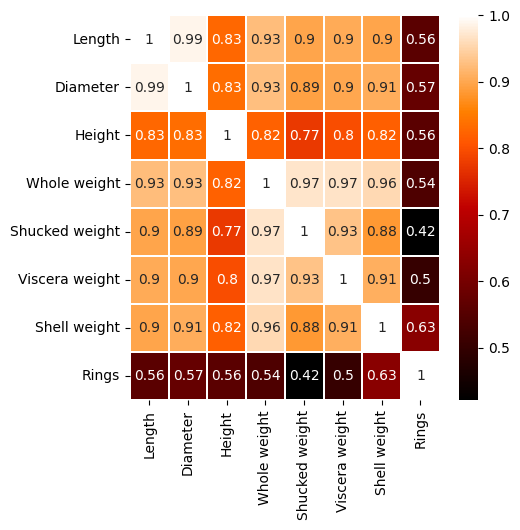

In [ ]:
# 데이터 간의 상관관계를 그래프로
import seaborn as sns
colormap = plt.cm.gist_heat   #그래프의 색상 구성
plt.figure(figsize=(5,5))   #그래프의 크기

# 그래프의 속성을 결정. vmax의 값을 1로 지정해 1에 가까울 수록 밝은 색으로 표시되게 함
sns.heatmap(df2.corr(),linewidths=0.1,vmax=1, cmap=colormap, linecolor='white', annot=True)
plt.show()

# 단순 선형회귀 실습
- 다양한 변수를 이용해서 순살 무게를 예측해보자!
- https://blog.naver.com/bce5180/222647224373

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

In [ ]:
#데이터프레임 칼럼
df2.columns

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [ ]:
#단순선형회귀
#독립변수(전체무게), 종속변수(순살무게) 데이터셋 준비
X=df2['Whole weight']
Y=df2['Shucked weight']

In [ ]:
#데이터셋 나누기
#test_size=0.3 -> 훈련데이터 70%, 테스트데이터 30%
#random_state  ->데이터셋을 나눌 때 항상 같은 간격으로 나누어 줌
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [ ]:
#차원변경
X_train=X_train.to_numpy().reshape(-1,1)
X_test=X_test.to_numpy().reshape(-1,1)
Y_train=Y_train.to_numpy().reshape(-1,1)
Y_test=Y_test.to_numpy().reshape(-1,1)

In [ ]:
#훈련데이터 갯수 확인: 4177*0.7=2923
X_train.shape, Y_train.shape

((2923, 1), (2923, 1))

In [ ]:
#선형회귀 모델 객체 선언
model=LinearRegression()
#훈련데이터로 모델 학습
model.fit(X_train, Y_train)
#테스트데이터 예측해보기
y_predict=model.predict(X_test)
y_predict

array([[0.48078691],
       [0.37893147],
       [0.42677266],
       ...,
       [0.33572007],
       [0.6529711 ],
       [0.13730039]])

In [ ]:
#mse 확인
mean_squared_error(Y_test,y_predict)

0.003159840571393022

In [ ]:
#모델 점수 확인
model.score(X_test,Y_test)

0.9335320827844025

In [ ]:
#가중치와 절편 확인
print(model.coef_)
print(model.intercept_)

[[0.44093262]]
[-0.00578224]


In [ ]:
#전체무게가 0.5키로인 전복의 순살 무게는 얼마일까?
model.predict([[0.5]])

array([[0.21468407]])

# 다중선형회귀 실습

In [ ]:
#독립변수(전체무게, 길이, 껍데기무게), 종속변수(순살무게) 데이터셋 준비
X2=df2[['Whole weight', 'Length', 'Shell weight']]
Y2=df2['Shucked weight']

In [ ]:
#데이터셋 나누기
#test_size=0.3 -> 훈련데이터 70%, 테스트데이터 30%
#random_state  ->데이터셋을 나눌 때 항상 같은 간격으로 나누어 줌
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2,Y2,test_size=0.3,random_state=42)

In [ ]:
#차원변경
Y2_train=Y2_train.to_numpy().reshape(-1,1)
Y2_test=Y2_test.to_numpy().reshape(-1,1)

In [ ]:
#선형회귀 모델 객체 선언
multi_model=LinearRegression()
#훈련데이터로 모델 학습
multi_model.fit(X2_train, Y2_train)
#테스트데이터 예측해보기
y2_predict=multi_model.predict(X2_test)
y2_predict

array([[0.47336845],
       [0.38898864],
       [0.38127965],
       ...,
       [0.37419236],
       [0.66598014],
       [0.1263284 ]])

In [ ]:
#훈련데이터 갯수 확인: 4177*0.7=2923
X2_train.shape, Y2_train.shape

((2923, 3), (2923, 1))

In [ ]:
#mse 확인
mean_squared_error(Y2_test,y_predict)

0.003159840571393022

In [ ]:
#모델 점수 확인
multi_model.score(X2_test, Y2_test)

0.9510771930740509

In [ ]:
#전체무게가 0.5키로이고 길이가 0.25, 껍데게 무게가 0.1키로인 전복의 순살 무게는 얼마일까?
multi_model.predict([[0.5, 0.25, 0.1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[0.23875626]])

# 미션: 독립변수를 달리하여 다중선형회귀 구현하기

In [ ]:
X3=df2[['Whole weight', 'Length', 'Rings']]
Y3=df2['Shucked weight']

In [ ]:
X3_train, X3_test, Y3_train, Y3_test = train_test_split(X3,Y3,test_size=0.3,random_state=42)

In [ ]:
Y3_train=Y3_train.to_numpy().reshape(-1,1)
Y3_test=Y3_test.to_numpy().reshape(-1,1)

In [ ]:
multi_model=LinearRegression()
multi_model.fit(X3_train, Y3_train)
y3_predict=multi_model.predict(X3_test)
y3_predict

array([[0.50333186],
       [0.40804034],
       [0.36900523],
       ...,
       [0.36640192],
       [0.66731715],
       [0.13975045]])

In [ ]:
X3_train.shape, Y3_train.shape

((2923, 3), (2923, 1))

In [ ]:
mean_squared_error(Y3_test,y_predict)

0.003159840571393022

In [ ]:
multi_model.score(X3_test, Y3_test)

0.9478696201714092

In [ ]:
multi_model.predict([[0.5, 0.25, 0.5]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[0.2771586]])